In [2]:
import pandas as pd
import numpy  as np
import os
import matplotlib.pyplot as plt

In [3]:
# Load data

labels = pd.read_csv("features_labels/labels_merged.csv") # Need to do one for audio and lexical too or all 4 merged

## Labels

In [4]:
# Pre-processing

labels['ID'] = labels['Name'].str[:5]
fspeak = ["P_001","P_002","P_003","P_004","P_005","P_006","P_007","P_008","P_009","P_010","P_011","Z_012","P_013"]
mspeak = ["Z_001","Z_002","Z_003","Z_004","Z_005","Z_006","Z_007","Z_008","Z_009","Z_010","Z_011","P_012","Z_013"]
labels.loc[labels['ID'].isin(fspeak), 'Gender'] = "female"
labels.loc[labels['ID'].isin(mspeak), 'Gender'] = "male"

In [5]:
labels['Arousal_binary'].value_counts()

1    283
0     97
Name: Arousal_binary, dtype: int64

In [6]:
labels['Valence_binary'].value_counts()

1    360
0     20
Name: Valence_binary, dtype: int64

Text(0, 0.5, 'Frequency')

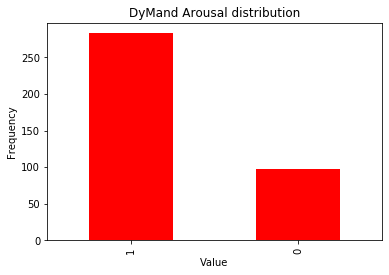

In [7]:

labels['Arousal_binary'].value_counts().plot(kind='bar', color="red")
plt.title("DyMand Arousal distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

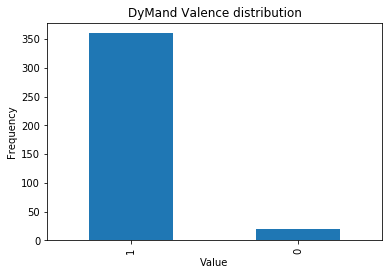

In [8]:
labels['Valence_binary'].value_counts().plot(kind='bar')
plt.title("DyMand Valence distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")

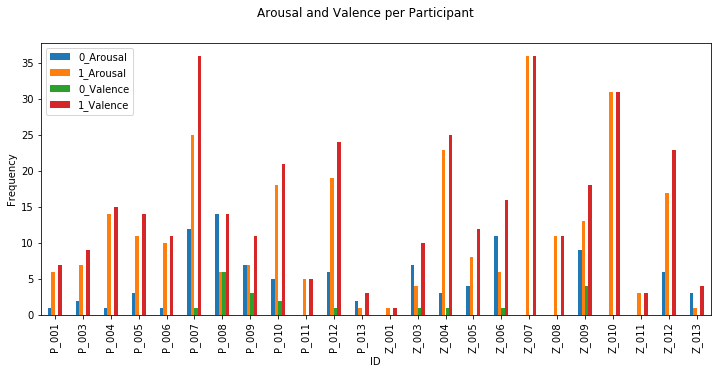

In [9]:
arousal_df = labels.groupby("ID")['Arousal_binary'].value_counts().unstack()
valence_df = labels.groupby("ID")['Valence_binary'].value_counts().unstack()

merged_counts = arousal_df.merge(valence_df, on='ID',suffixes=('_Arousal', '_Valence')).fillna(0)

merged_counts.plot.bar(figsize=(12,5))
plt.suptitle("Arousal and Valence per Participant")
plt.ylabel("Frequency")
plt.savefig("AV_per_participant.png")

In [9]:
labels.columns

Index(['Name', 'Arousal_binary', 'Valence_binary', 'ID', 'Gender'], dtype='object')

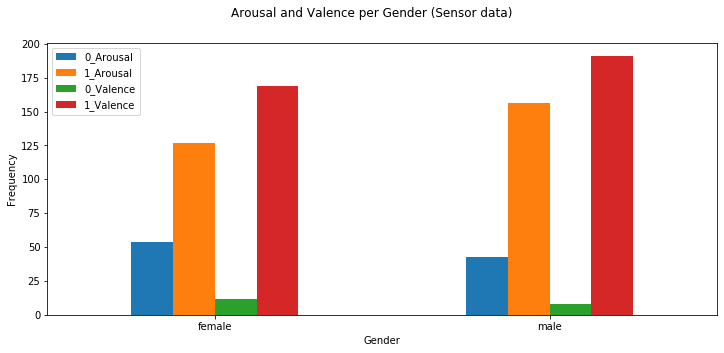

In [10]:
arousal_df = labels.groupby("Gender")['Arousal_binary'].value_counts().unstack()
valence_df = labels.groupby("Gender")['Valence_binary'].value_counts().unstack()

merged_counts = arousal_df.merge(valence_df, on='Gender',suffixes=('_Arousal', '_Valence')).fillna(0)

merged_counts.plot.bar(figsize=(12,5),rot=0)
plt.suptitle("Arousal and Valence per Gender (Sensor data)")
plt.ylabel("Frequency")
plt.savefig("AV_per_Gender.png")

Text(0, 0.5, 'Frequency')

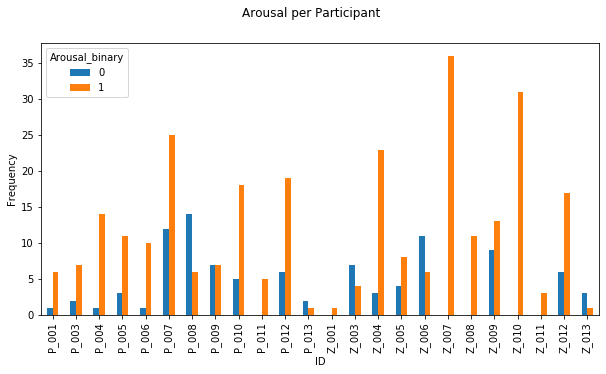

In [11]:
labels.groupby("ID")['Arousal_binary'].value_counts().unstack().plot.bar(figsize=(10,5))
plt.suptitle("Arousal per Participant")
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

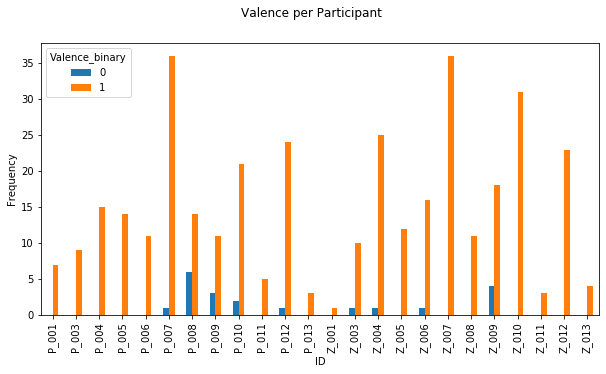

In [12]:
labels.groupby("ID")['Valence_binary'].value_counts().unstack().plot.bar(figsize=(10,5))
plt.suptitle("Valence per Participant")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

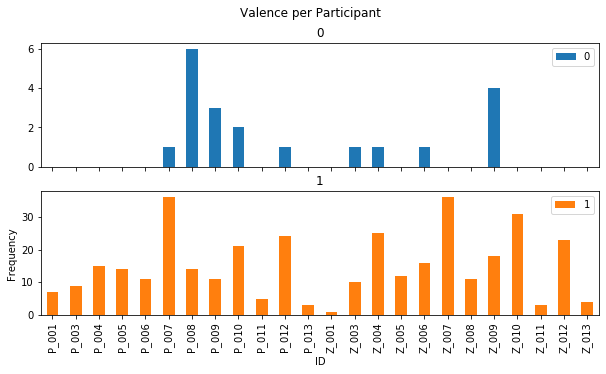

In [13]:
labels.groupby("ID")['Valence_binary'].value_counts().unstack('Valence_binary').plot.bar(subplots=True, figsize=(10,5))
plt.suptitle("Valence per Participant")
plt.ylabel("Frequency")

In [73]:
labels.groupby("ID")['Arousal_binary'].value_counts().unstack('Arousal_binary')

Arousal_binary,0,1
ID,,
P_001,2.0,9.0
P_003,2.0,8.0
P_004,1.0,19.0
P_005,5.0,11.0
P_006,1.0,11.0
P_007,12.0,32.0
P_008,15.0,9.0
P_009,8.0,7.0
P_010,5.0,18.0


In [72]:
labels.groupby("ID")['Valence_binary'].value_counts().unstack('Valence_binary')

Valence_binary,0,1
ID,,
P_001,NaN,11.0
P_003,NaN,10.0
P_004,NaN,20.0
P_005,NaN,16.0
P_006,NaN,12.0
P_007,1.0,43.0
P_008,6.0,18.0
P_009,3.0,12.0
P_010,2.0,21.0


Text(0, 0.5, 'Frequency')

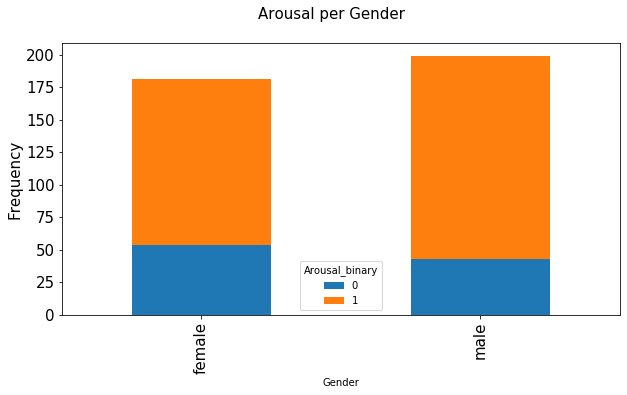

In [14]:
labels.groupby("Gender")['Arousal_binary'].value_counts().unstack('Arousal_binary').plot.bar(stacked=True, fontsize=15, figsize=(10,5))
plt.suptitle("Arousal per Gender",fontsize=15)
plt.ylabel("Frequency",fontsize=15)


Text(0, 0.5, 'Frequency')

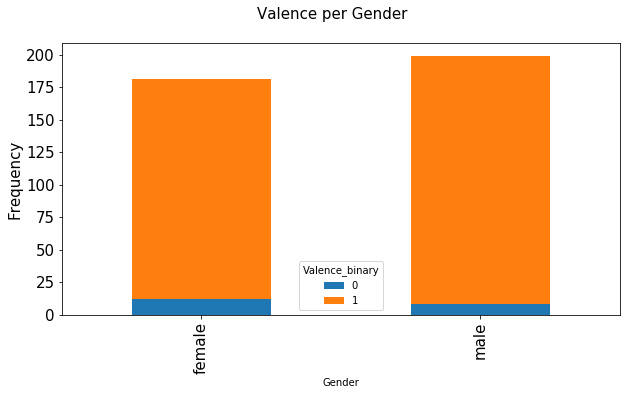

In [15]:
labels.groupby("Gender")['Valence_binary'].value_counts().unstack('Valence_binary').plot.bar(stacked=True, fontsize=15, figsize=(10,5))
plt.suptitle("Valence per Gender", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
